# Yelp Review Classifier
This notebook serves as a challenge to implement and explore LSTM and Convolution model over the new Yelp review dataset. You have to fill up all the blanks with the hyperparameters that helps you get the best accuracy and loss.

In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.12.0


## Downloading the TensorFlow `yelp_popularity_review` dataset

> Make sure tensorflow_datasets is installed

In [2]:
##load the yelp reviews dataset
data, info = tfds.load("yelp_polarity_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/560000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0.incompleteYDN2TF/yelp_polarity_reviews-train.t…

Generating test examples...:   0%|          | 0/38000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0.incompleteYDN2TF/yelp_polarity_reviews-test.tf…

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0. Subsequent calls will reuse this data.


In [3]:
train_data, test_data = data['train'], data['test']

train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [4]:
for sent, label in train_data:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

for sent, label in test_data:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())


train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [5]:
##define the parameters for tokenizing and padding
vocab_size = 10000
embedding_dim = 32
max_length = 120
padding_type = 'post'
trunc_type='post'
oov_tok = "<OOV>"

In [7]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs,maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

## Explore the LSTM & CNN model with the following layers:
1. Embedding layer
2. Try two bidirectional LSTM layers or a Conv1D layer or both.
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 120, 256)         164864    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 653,377
Trainable params: 653,377
Non-trai

In [10]:
num_epochs = 10
history = model.fit(
    train_padded, 
    train_labels, 
    epochs=num_epochs, 
    validation_data=(test_padded, test_labels)
    )

Epoch 1/10
17500/17500 [==============================] - 422s 23ms/step - loss: 0.2064 - accuracy: 0.9158 - val_loss: 0.1483 - val_accuracy: 0.9424
Epoch 2/10
17500/17500 [==============================] - 343s 20ms/step - loss: 0.1481 - accuracy: 0.9416 - val_loss: 0.1347 - val_accuracy: 0.9483
Epoch 3/10
17500/17500 [==============================] - 342s 20ms/step - loss: 0.1265 - accuracy: 0.9509 - val_loss: 0.1294 - val_accuracy: 0.9500
Epoch 4/10
17500/17500 [==============================] - 339s 19ms/step - loss: 0.1097 - accuracy: 0.9580 - val_loss: 0.1365 - val_accuracy: 0.9482
Epoch 5/10
17500/17500 [==============================] - 335s 19ms/step - loss: 0.0932 - accuracy: 0.9650 - val_loss: 0.1462 - val_accuracy: 0.9475
Epoch 6/10
17500/17500 [==============================] - 335s 19ms/step - loss: 0.0767 - accuracy: 0.9720 - val_loss: 0.1533 - val_accuracy: 0.9466
Epoch 7/10
17500/17500 [==============================] - 333s 19ms/step - loss: 0.0620 - accuracy: 0.9777

## Visualise the accuracy and loss

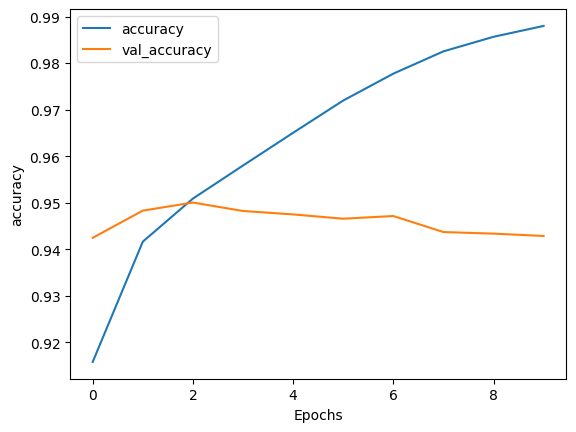

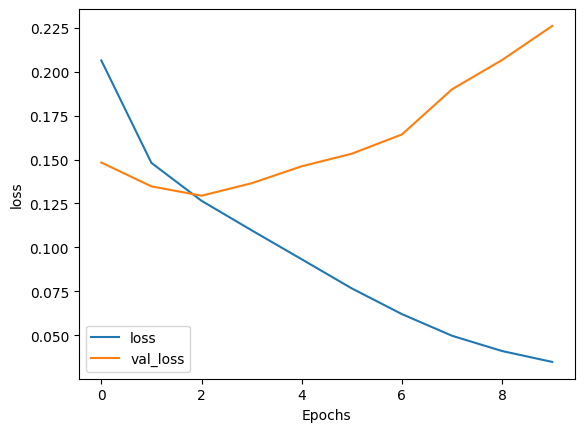

In [11]:
import matplotlib.pyplot as plt


def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
  
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

## Classify new reviews

In [12]:
sentence = ["the restaurant served a delicious pasta", "the restaurant didn't have a decent ambience"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 1s 1s/step
[[0.5543664 ]
 [0.20742185]]
